In [1]:
!pip install torch transformers accelerate

In [2]:
!pip install gradio

In [3]:
!pip install accelerate

In [4]:
!pip install spaces

In [5]:
import spaces
import gradio as gr
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

title = """# 👋🏻Welcome To 🌟Tonic's🌐Aya-101"""
description = """The Aya model is a massively multilingual generative language model that follows instructions in 101 languages.  You can build with this endpoint using🌐Aya-101 available here : [CohereForAI/aya-101](https://huggingface.co/CohereForAI/aya-101). Try your own language out !
You can also use 🌐Aya-101 by cloning this space. Simply click here: <a style="display:inline-block" href="https://huggingface.co/spaces/Tonic/Aya?duplicate=true"><img src="https://img.shields.io/badge/-Duplicate%20Space-blue?labelColor=white&style=flat&logo=data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAP5JREFUOE+lk7FqAkEURY+ltunEgFXS2sZGIbXfEPdLlnxJyDdYB62sbbUKpLbVNhyYFzbrrA74YJlh9r079973psed0cvUD4A+4HoCjsA85X0Dfn/RBLBgBDxnQPfAEJgBY+A9gALA4tcbamSzS4xq4FOQAJgCDwV2CPKV8tZAJcAjMMkUe1vX+U+SMhfAJEHasQIWmXNN3abzDwHUrgcRGmYcgKe0bxrblHEB4E/pndMazNpSZGcsZdBlYJcEL9Afo75molJyM2FxmPgmgPqlWNLGfwZGG6UiyEvLzHYDmoPkDDiNm9JR9uboiONcBXrpY1qmgs21x1QwyZcpvxt9NS09PlsPAAAAAElFTkSuQmCC&logoWidth=14" alt="Duplicate Space"></a></h3> the easiest way to use Aya-101 is to use the Cohere CLI and their playground. Try finetuning the version with open weights !
Join us : 🌟TeamTonic🌟 is always making cool demos! Join our active builder's 🛠️community 👻 [![Join us on Discord](https://img.shields.io/discord/1109943800132010065?label=Discord&logo=discord&style=flat-square)](https://discord.gg/GWpVpekp) On 🤗Huggingface: [TeamTonic](https://huggingface.co/TeamTonic) & [MultiTransformer](https://huggingface.co/MultiTransformer) Math with [introspector](https://huggingface.co/introspector) On 🌐Github: [Tonic-AI](https://github.com/tonic-ai) & contribute to🌟 [MultiTonic](https://github.com/Tonic-AI/MultiToniic)🤗Big thanks to Yuvi Sharma and all the folks at huggingface for the community grant 🤗
"""

device = "cuda"
checkpoint = "CohereForAI/aya-101"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint, torch_dtype=torch.bfloat16, low_cpu_mem_usage=True, device_map=device)

@spaces.GPU
def aya(text, max_new_tokens, repetition_penalty):
    model.to(device)
    inputs = tokenizer.encode(text, return_tensors="pt").to(device)
    outputs = model.generate(inputs, max_new_tokens=max_new_tokens, repetition_penalty=repetition_penalty)
    translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translation

def main():
    with gr.Blocks() as demo:
        gr.Markdown(title)
        gr.Markdown(description)
        input_text = gr.Textbox(label="🗣️Input Text")
        max_new_tokens_slider = gr.Slider(minimum=150, maximum=1648, step=1, value=250, label="Size of your inputs and answer")
        repetition_penalty_slider = gr.Slider(minimum=1.0, maximum=4.0, step=0.1, value=1.8, label="Repetition Penalty")
        submit_button = gr.Button("Use🌐Aya")
        output_text = gr.Textbox(label="🌐Aya", interactive=False)
        submit_button.click(fn=aya, inputs=[input_text, max_new_tokens_slider, repetition_penalty_slider], outputs=output_text)

    demo.launch()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/11 [00:00<?, ?it/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://121549b3c2da3f2597.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


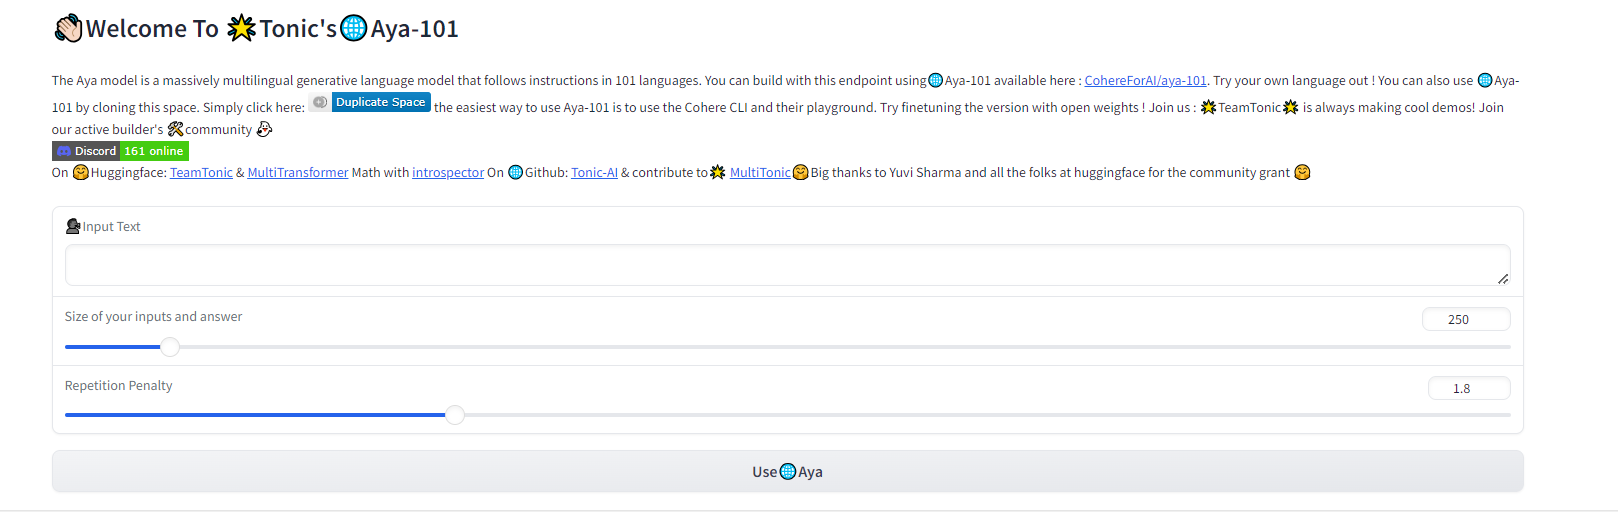